In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy import special
%matplotlib inline

Text(0.5, 1.0, 'temporal kernal of gain')

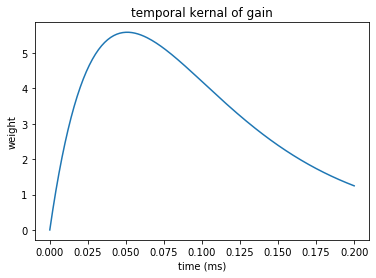

In [2]:
#Adaptation filter
tau_y = 0.0506
tau_z = 0.5769
gamma = 0.764
beta_c = -605
dt = 0.001
def Ky(t):
    return t*np.exp(-t/tau_y)/(tau_y**2)
def Kz(t):
    y = gamma*t*np.exp(-t/tau_y)/(tau_y**2)
    z = (1-gamma)*t*np.exp(-t/tau_z)/(tau_z**2)
    return y+z
length = 30
temp_Kz = Kz(np.arange(0,0.2+dt,dt))
plt.plot(np.arange(0,0.2+dt,dt),temp_Kz)
plt.xlabel('time (ms)')
plt.ylabel('weight')
plt.title('temporal kernal of gain')

In [3]:
def K(x,s):
    return(np.exp(-(x/s)**2))/s/np.sqrt(np.pi)

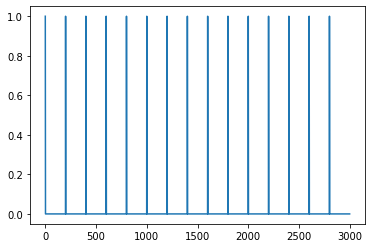

In [42]:
nstep = 3000
frequency = 5#Hz
nperiod = int((1/frequency)/dt)
# generation of stimulations
s = np.zeros(nstep)
for i in range(nstep):
    if i % nperiod ==0:
        s[i] = 1
#s = np.convolve(tp,s,'same')*dt
plt.plot(s)

In [54]:
nperiod

200

In [108]:
x = np.zeros_like(s)#y output
y = np.zeros_like(s)#y output
B = 35
C = 1
beta = 1.5
for i in np.arange(1,len(s)):
    x[i] = C/(1+y[i-1]**4)
    y[i] = np.exp(-beta)*(Constant*x[i] + y[i-1])

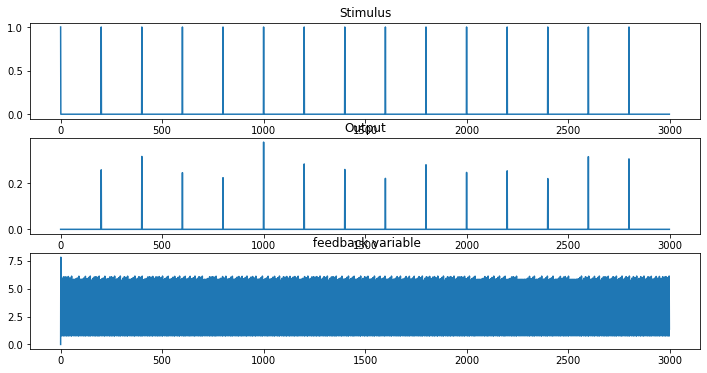

In [109]:
plt.subplot(311)
plt.plot(s)
plt.title('Stimulus')
plt.subplot(312)
plt.plot(x*s)
plt.title('Output')
plt.subplot(313)
plt.plot(y)
plt.title(' feedback variable')
plt.gcf().set_size_inches(12,6)

In [91]:
y

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       9.01010570e-94, 2.99920365e-94, 9.98348169e-95])